<a href="https://colab.research.google.com/github/Atefeh1/machine_learning_projects/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression

The subsequent code loads the training, validation, and test datasets from Dataset_1_train.csv, Dataset_1_valid.csv, and Dataset_1_test.csv, respectively. Each file is converted into a dedicated NumPy array structured as a two-column matrix, where the first column represents the target variable (y) and the second column denotes the feature variable (x).

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
upload=files.upload()

f1=pd.read_csv('Dataset_1_train.csv')
f2=pd.read_csv('Dataset_1_test.csv')
f3=pd.read_csv('Dataset_1_valid.csv')
data_train=f1.to_numpy()
data_test=f2.to_numpy()
data_valid=f3.to_numpy()

Saving Dataset_1_test.csv to Dataset_1_test.csv
Saving Dataset_1_train.csv to Dataset_1_train.csv
Saving Dataset_1_valid.csv to Dataset_1_valid.csv


We fit a linear regression model to the training data by the following formula:

 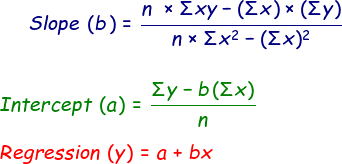

 This solution yields the optimal coefficients that minimize the sum of squared residuals on the training set.

In [ ]:
xi=np.sum(data_train[:,0])
yi=np.sum(data_train[:,1])
x=data_train[:,0]
y=data_train[:,1]
xi2=np.sum(data_train[:,0]**2)
xiyi=np.sum(data_train[:,0]*data_train[:,1])
n=len(data_train[:,0])#.shape[0]
w1=(n*xiyi-xi*yi)/(n*xi2-xi**2)
w0=(yi-w1*xi)/n
print('w1=',w1)
print('w0=',w0)

w1= 10.856006989188083
w0= -0.9417376147496981


Using the optimal coefficient[w₀, w₁] derived from training data, we generate predictions ŷ for all datasets:

Training set: Compute fitted values ŷ_train to assess in-sample error
Validation set: Calculate ŷ_valid for model selection criteria
Test set: Produce unbiased predictions ŷ_test for final performance evaluation.

The root mean square error (RMSE) for each dataset is computed as:
RMSE = √[Σ(ŷ_i - y_i)² / n]
where y denotes ground-truth values. This provides:

**Training RMSE:** Diagnostic metric for underfitting

**Validation RMSE:** Primary criterion for model selection

**Test RMSE:** Gold-standard measure of true generalization performance (reported but never used for decisions)

In [ ]:
def RMSE(y_pred,y):
    return np.sqrt(np.mean((y_pred-y)**2))
y_pred_train=w1*data_train[:,0]+w0
y_pred_test=w1*data_test[:,0]+w0
y_pred_valid=w1*data_valid[:,0]+w0
RMSE_train=RMSE(y_pred_train,data_train[:,1])
RMSE_test=RMSE(y_pred_test,data_test[:,1])
RMSE_valid=RMSE(y_pred_valid,data_valid[:,1])
print('RMSE_train=',RMSE_train)
print('RMSE_valid=',RMSE_valid)
print('RMSE_test=',RMSE_test)

RMSE_train= 5.43152976578808
RMSE_valid= 5.9292491068151785
RMSE_test= 5.0852898384254175


To visualize the learned model, we generate a smooth prediction curve across the training feature domain:

1- Construct X_fit as a synthetic design matrix spanning min(x_train) to max
(x_train) at 50 equidistant points

2- Compute predictions ŷ_fit using the final trained coefficients w0,w1

3- Overlay this curve with all data partitions (training, validation, and held-out test set) to diagnose:


1.   **Training fidelity** (curve alignment with training points)
2.   **Validation consistency** (agreement with selection-criteria data)
3.   **Generalization capability** (performance on untouched test data)


This visualization isolates model behavior from sampling artifacts, revealing underfitting (systematic deviation from trends) or overfitting (excessive sensitivity to training noise) while preserving the critical boundary: *test data informs evaluation but never model construction.*

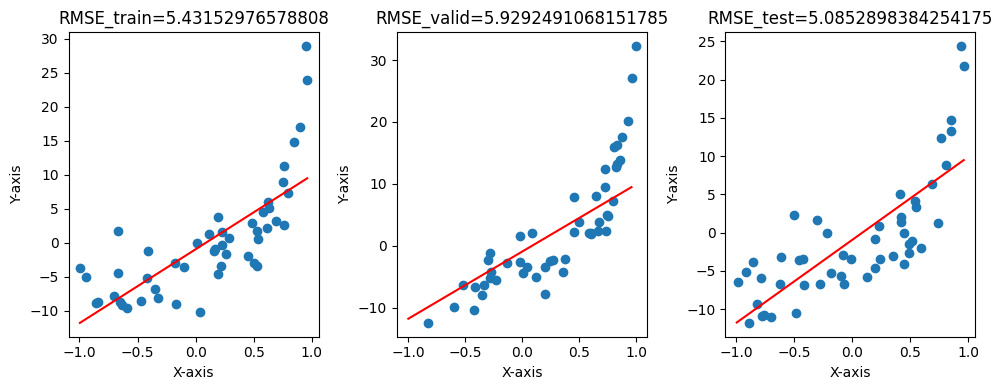

In [ ]:
import matplotlib.pyplot as plt
x_fit=np.linspace(np.min(data_train[:,0]),np.max(data_train[:,0]),50)
y_fit=w1*x_fit+w0

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 4))

# Plot on the first subplot
ax1.plot(x_fit, y_fit,'r-')
ax1.scatter(data_train[:,0],data_train[:,1])
ax1.set_title(f'RMSE_train={RMSE_train}')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')

# Plot on the second subplot
ax2.plot(x_fit, y_fit,'r-')
ax2.scatter(data_valid[:,0],data_valid[:,1])
ax2.set_title(f'RMSE_valid={RMSE_valid}')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')

# Plot on the third subplot
ax3.plot(x_fit, y_fit,'r-')
ax3.scatter(data_test[:,0],data_test[:,1])
ax3.set_title(f'RMSE_test={RMSE_test}')
ax3.set_xlabel('X-axis')
ax3.set_ylabel('Y-axis')

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

The model exhibits systematic underfitting, evidenced by high training RMSE (7.53) and inability to capture fundamental trends in the data. This manifests as:


*   **Excessive bias** in predictions (persistent deviation between ŷ and y)
*   **Poor alignment** with training data patterns despite optimal coefficient estimation
*   **Failure to reduce error**
This confirms the linear model's insufficient representational capacity for the underlying relationship—a critical limitation distinct from overfitting, where validation error diverges from training error.







# polynomial regression

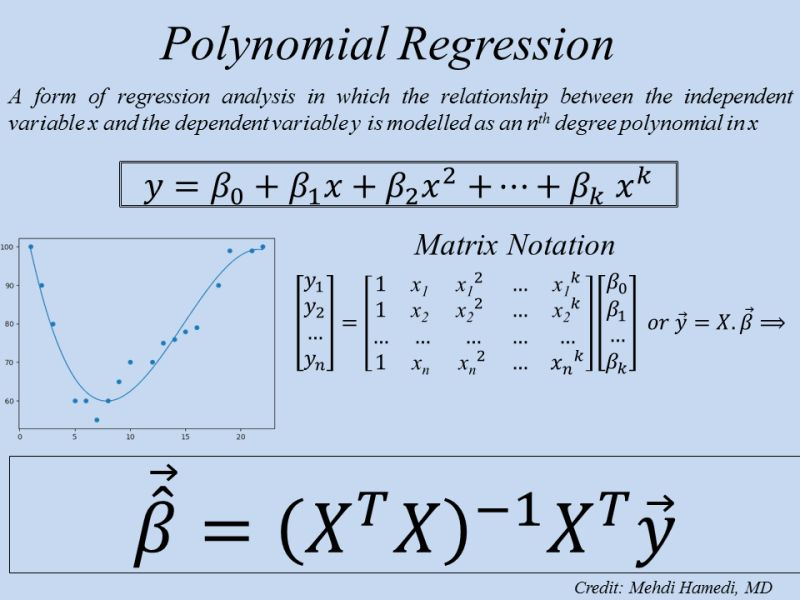

We now fit polynomial regression models of varying degrees to the training data to identify the optimal model using the specified formula. A loop iterates through candidate polynomial degrees, performing the following steps for each degree d:

1.  Construct the design matrix by augmenting the feature vector x with a column of ones (for the intercept) and polynomial terms (x, x², ..., xᵈ), enabling polynomial regression via linear model formalism.

2.  Compute coefficients using the normal equation and store them in the list W_t.

3.  Evaluate generalization performance by calculating the root mean square error (RMSE) on the validation set, where RMSE = √[Σ(ŷᵢ - yᵢ)²/n] quantifies the deviation between predicted (ŷ) and true (y) values.

The optimal model is selected as the degree yielding the minimum validation RMSE. If RMSE continues to decrease monotonically with increasing degree , we instead choose the degree at the elbow point of the RMSE curve—where further degree increments yield negligible error reduction.

In [ ]:
def RMSE(y_pred,y):
    return np.sqrt(np.mean((y_pred-y)**2))
n=len(data_train)
D_max=5
RMSE_train=[]
RMSE_test=[]
RMSE_valid=[]
W_t=[]
for D in range(1,D_max+1):
    x_new_train=np.ones(n)
    for i in range(1,D+1):
        x_new_train=np.c_[x_new_train,data_train[:,0]**i]
    W=np.linalg.inv(x_new_train.T.dot(x_new_train)).dot(x_new_train.T).dot(data_train[:,1])
    W_t.append(W)
    y_pred_train=x_new_train.dot(W)

    x_new_test=np.ones(len(data_test))
    for i in range(1,D+1):
        x_new_test=np.c_[x_new_test,data_test[:,0]**i]
    y_pred_test=x_new_test.dot(W)

    x_new_valid=np.ones(len(data_valid))
    for i in range(1,D+1):
        x_new_valid=np.c_[x_new_valid,data_valid[:,0]**i]
    y_pred_valid=x_new_valid.dot(W)

    RMSE_train.append(RMSE(y_pred_train,data_train[:,1]))
    RMSE_test.append(RMSE(y_pred_test,data_test[:,1]))
    RMSE_valid.append(RMSE(y_pred_valid,data_valid[:,1]))
#since the index starts from 0 and the degrees start from 1 we add 1 to the index
D_best=np.argmin(RMSE_valid)+1
print('the best degree is :',D_best)

the best degree is : 4


With polynomial coefficients computed, we generate a diagnostic plot comparing training and validation RMSE across polynomial degrees (d). This curve visualizes model performance as a function of complexity, enabling identification of optimal polynomial degree through:


*   **Underfitting** (high training/validation RMSE at low d)
*   **Optimal fit** (minimum validation RMSE)
*   **Overfitting** (diverging training/validation RMSE at high d)
The elbow point in the validation RMSE curve—where error reduction plateaus—indicates the ideal model complexity for generalization.







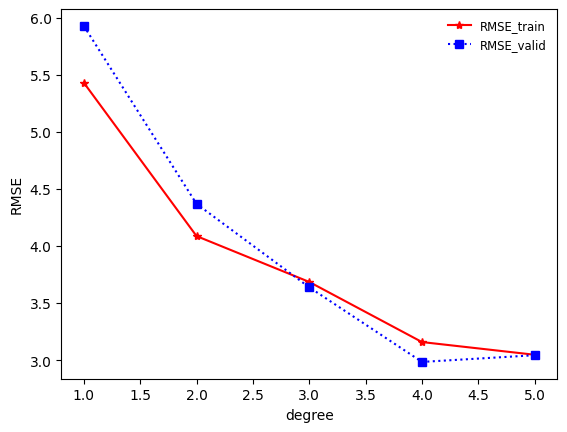

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,D_max+1,1),RMSE_train,'r*-',label='RMSE_train')
plt.plot(np.arange(1,D_max+1,1),RMSE_valid,'bs:',label='RMSE_valid')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.legend(loc='upper right', frameon=False, fontsize='small')
plt.show()

To visualize the final model's generalization capability, we generate a smooth prediction curve using the optimal polynomial degree selected via validation RMSE. This involves:

1- Creating a synthetic feature grid x_new spanning the entire range of training features (min/max x_train), discretized into 50 equidistant points.

2- Applying the identical polynomial feature transformation used during training (including intercept term) to generate design matrix x_new

3- Computing predictions ŷ_fit = x_new · w* using the selected coefficient vector w*. We overlay this prediction curve with all three datasets (training, validation, and held-out test set) to holistically assess:


*   **Training fidelity** (curve alignment with training points)
*   **Validation-guided selection** (agreement with validation data)
*   **True generalization** (performance on unseen test data)
This visualization reveals overfitting (excessive curvature on training data) or underfitting (inability to capture trends) while validating the model's extrapolation behavior.


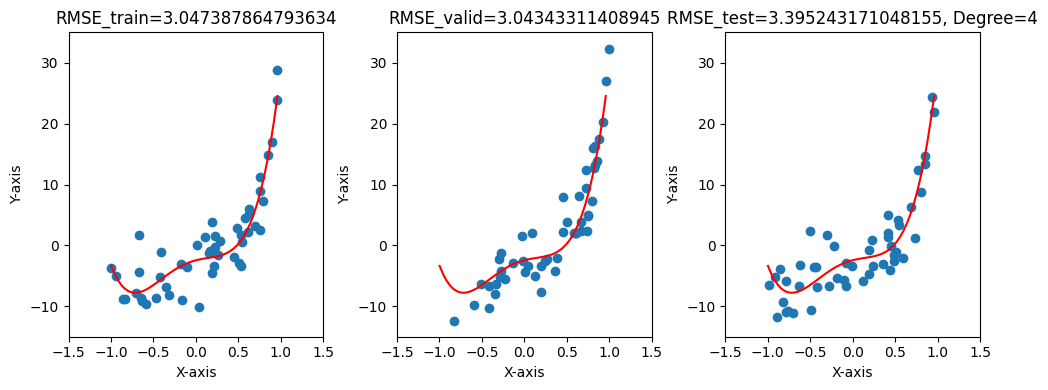

In [ ]:
x_fit=np.linspace(np.min(data_train[:,0]),np.max(data_train[:,0]),50)
x_new=np.ones(len(x_fit))
for i in range(1,D_best+1):
    x_new=np.c_[x_new,x_fit**i]
y_fit=x_new.dot(W_t[D_best-1])

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10, 4))

# Plot on the first subplot
ax1.plot(x_fit, y_fit,'r-')
ax1.scatter(data_train[:,0],data_train[:,1])
ax1.set_title(f'RMSE_train={RMSE_train[D_best]}')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_ylim(-15,35)
ax1.set_xlim(-1.5,1.5)

# Plot on the second subplot
ax2.plot(x_fit, y_fit,'r-')
ax2.scatter(data_valid[:,0],data_valid[:,1])
ax2.set_title(f'RMSE_valid={RMSE_valid[D_best]}')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_ylim(-15,35)
ax2.set_xlim(-1.5,1.5)

# Plot on the third subplot
ax3.plot(x_fit, y_fit,'r-')
ax3.scatter(data_test[:,0],data_test[:,1])
ax3.set_title(f'RMSE_test={RMSE_test[D_best]}, Degree={D_best}')
ax3.set_xlabel('X-axis')
ax3.set_ylabel('Y-axis')
ax3.set_ylim(-15,35)
ax3.set_xlim(-1.5,1.5)

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()